# **Import required Libraries**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# **Load Dataset**

In [39]:
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # Binary classification

# **Normalize**

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Activation Function**

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# **MLP class**

In [42]:
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.weights1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.bias1 = np.zeros((1, hidden_dim))
        self.weights2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.bias2 = np.zeros((1, output_dim))
        self.loss_history = []  # Track loss over time

    def predict(self, X):
        z1 = X.dot(self.weights1) + self.bias1
        a1 = sigmoid(z1)
        z2 = a1.dot(self.weights2) + self.bias2
        a2 = sigmoid(z2)
        return a2

    def train(self, X, y, lr, epochs):
        for epoch in range(epochs):
            # Forward pass
            z1 = X.dot(self.weights1) + self.bias1
            a1 = sigmoid(z1)
            z2 = a1.dot(self.weights2) + self.bias2
            a2 = sigmoid(z2)

            # Backpropagation
            error = a2 - y
            delta2 = error * sigmoid_derivative(a2)
            delta1 = delta2.dot(self.weights2.T) * sigmoid_derivative(a1)

            # Update weights
            self.weights2 -= lr * a1.T.dot(delta2)
            self.bias2 -= lr * np.sum(delta2, axis=0, keepdims=True)
            self.weights1 -= lr * X.T.dot(delta1)
            self.bias1 -= lr * np.sum(delta1, axis=0, keepdims=True)

            # Track loss
            loss = np.mean(np.square(error))
            self.loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

# **Train-test split**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train the model**

In [44]:
mlp = MLP(input_dim=X_train.shape[1], hidden_dim=16, output_dim=1)
mlp.train(X_train, y_train, lr=0.1, epochs=2000)

Epoch 0, Loss: 0.2521
Epoch 100, Loss: 0.0109
Epoch 200, Loss: 0.0084
Epoch 300, Loss: 0.0068
Epoch 400, Loss: 0.0057
Epoch 500, Loss: 0.0049
Epoch 600, Loss: 0.0042
Epoch 700, Loss: 0.0038
Epoch 800, Loss: 0.0035
Epoch 900, Loss: 0.0032
Epoch 1000, Loss: 0.0030
Epoch 1100, Loss: 0.0029
Epoch 1200, Loss: 0.0028
Epoch 1300, Loss: 0.0027
Epoch 1400, Loss: 0.0026
Epoch 1500, Loss: 0.0026
Epoch 1600, Loss: 0.0025
Epoch 1700, Loss: 0.0025
Epoch 1800, Loss: 0.0024
Epoch 1900, Loss: 0.0024


# **Predictions**

In [45]:
preds = mlp.predict(X_test)
pred_labels = (preds > 0.5).astype(int)
accuracy = np.mean(pred_labels == y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 97.37%


# **Data visualization**
**Loss curve**

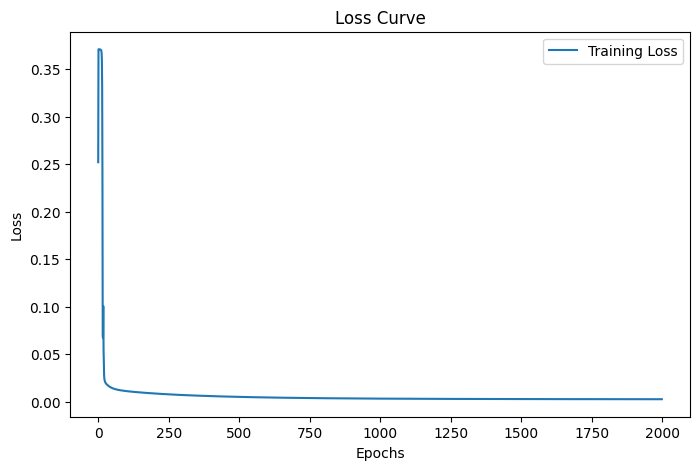

In [46]:
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# **Confusion Matrix**

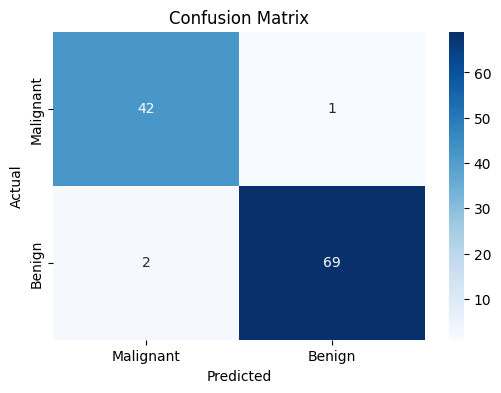

In [47]:
cm = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [48]:
print("\nClassification Report:\n")
print(classification_report(y_test, pred_labels, target_names=['Malignant', 'Benign']))


Classification Report:

              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.97        43
      Benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

